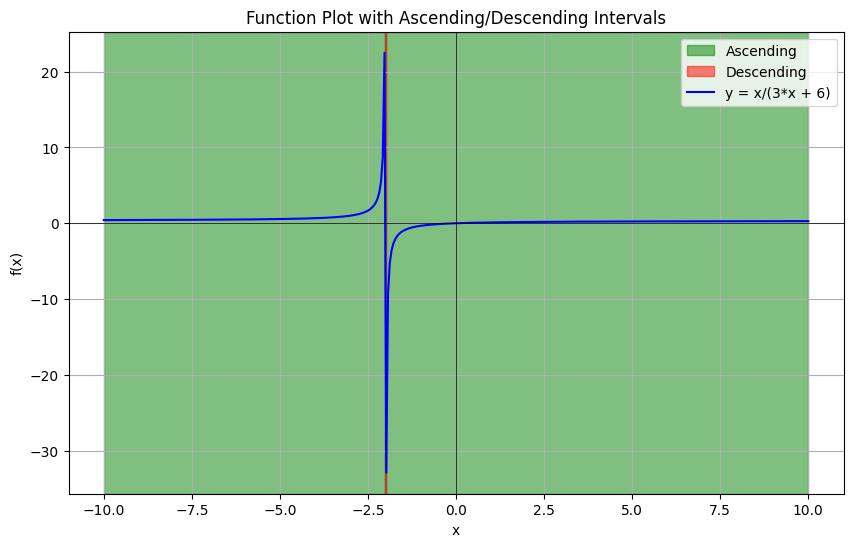

Range of the function on the interval [-2.030075187969925, -1.9799498746867172] is [-32.9166666666674, 22.499999999999837]
Increasing Intervals:
[-10.0, -2.030075187969925]
[-1.9799498746867172, 10.0]
Decreasing Intervals:
[-2.030075187969925, -1.9799498746867172]


In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import Symbol, sympify, lambdify

def plot_function_and_analyze_range():
    # Input from user
    func_str = input("Enter the function of x (e.g., 'x**2 + 2*x - 1'): ")
    interval_str = input("Enter the interval as two numbers separated by a comma (e.g., '0, 10'): ")

    # Parse function and interval
    x = Symbol('x')
    func = sympify(func_str)
    interval = list(map(float, interval_str.split(',')))
    x_vals = np.linspace(interval[0], interval[1], 400)
    
    # Convert sympy function to a numpy function for plotting
    f = lambdify(x, func, 'numpy')
    y_vals = f(x_vals)

    # Prepare for plotting
    plt.figure(figsize=(10, 6))
    
    # Determine intervals where the function is increasing or decreasing
    increasing_intervals = []
    decreasing_intervals = []

    current_interval = []
    increasing = None

    for i in range(1, len(x_vals)):
        if y_vals[i] > y_vals[i - 1]:  # Ascending
            if increasing is None or increasing is False:
                if current_interval:
                    decreasing_intervals.append(current_interval)
                current_interval = [x_vals[i - 1]]
                increasing = True
            current_interval.append(x_vals[i])
        elif y_vals[i] < y_vals[i - 1]:  # Descending
            if increasing is None or increasing is True:
                if current_interval:
                    increasing_intervals.append(current_interval)
                current_interval = [x_vals[i - 1]]
                increasing = False
            current_interval.append(x_vals[i])
    
    # Append the last interval if any
    if increasing is True:
        increasing_intervals.append(current_interval)
    elif increasing is False:
        decreasing_intervals.append(current_interval)

    # Plot the function with background shading for ascending/descending intervals
    for interval in increasing_intervals:
        plt.axvspan(interval[0], interval[-1], color='green', alpha=0.5, label='Ascending' if interval == increasing_intervals[0] else "")
    for interval in decreasing_intervals:
        plt.axvspan(interval[0], interval[-1], color='red', alpha=0.5, label='Descending' if interval == decreasing_intervals[0] else "")

    # Plot the function curve
    plt.plot(x_vals, y_vals, color='blue', label=f'y = {func}')

    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.title('Function Plot with Ascending/Descending Intervals')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Determine range of the function
    y_min, y_max = min(y_vals), max(y_vals)
    print(f"Range of the function on the interval [{interval[0]}, {interval[1]}] is [{y_min}, {y_max}]")

    # Print increasing and decreasing intervals
    print("Increasing Intervals:")
    for interval in increasing_intervals:
        print(f"[{interval[0]}, {interval[-1]}]")

    print("Decreasing Intervals:")
    for interval in decreasing_intervals:
        print(f"[{interval[0]}, {interval[-1]}]")

if __name__ == "__main__":
    plot_function_and_analyze_range()
